# Kings County WA House Price Dataset
# 2조 : 김현솔, 박기열, 오세연, 최민성

In [25]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from PIL import Image

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

plt.rc('font', family='Malgun Gothic') # 한글폰트 사용

<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P3/src/KCC.png' width=400/>

In [27]:
df = pd.read_csv('kc_houseprice.csv')

df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


# 데이터탐색

id : A notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms

sqft_living: Square footage of the home (생활면적 평방미터)

sqft_lot: Square footage of the lot (대지면적 평방미터)

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above : Square footage of house apart from basement (지상 생활 면적)

sqft_basement: Square footage of the basement (지하 생활 면적)

yr_built : Built Year

yr_renovated : Year when house was renovated

zipcode: Zip code (우편번호)

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 : LotSize area in 2015(implies-- some renovations)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [30]:
df['price'].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3625, dtype: int64

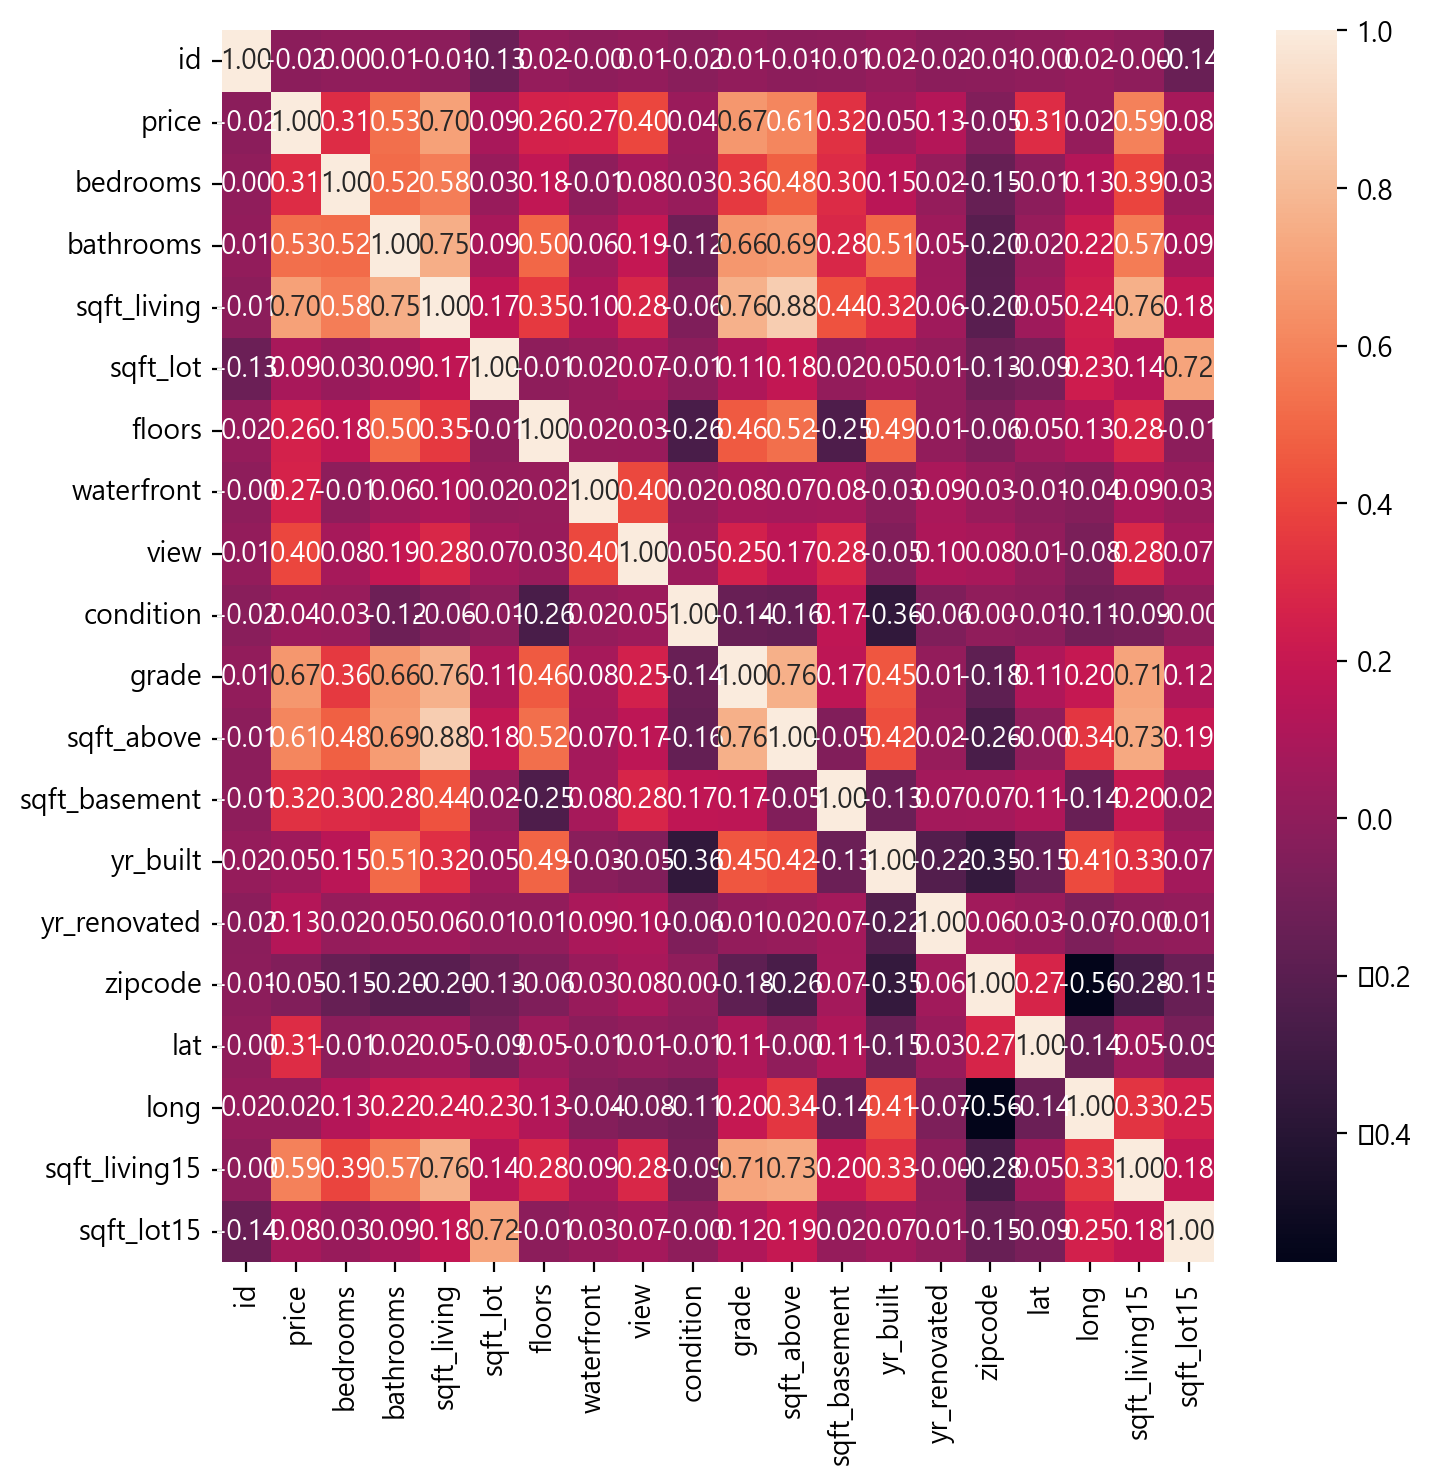

In [31]:
plt.figure(figsize = (8,8))

sns.heatmap(df.corr(), annot = True, fmt = '.2f')
plt.show()

### PRICE(집값) 과의 상관계수 TOP 5
- 1위 : sqft_living (0.7)
- 2위 : grade (0.67)
- 3위 : sqft_above (0.61)
- 4위 : sqft_living15 (0.59)
- 5위 : bathrooms (0.53)

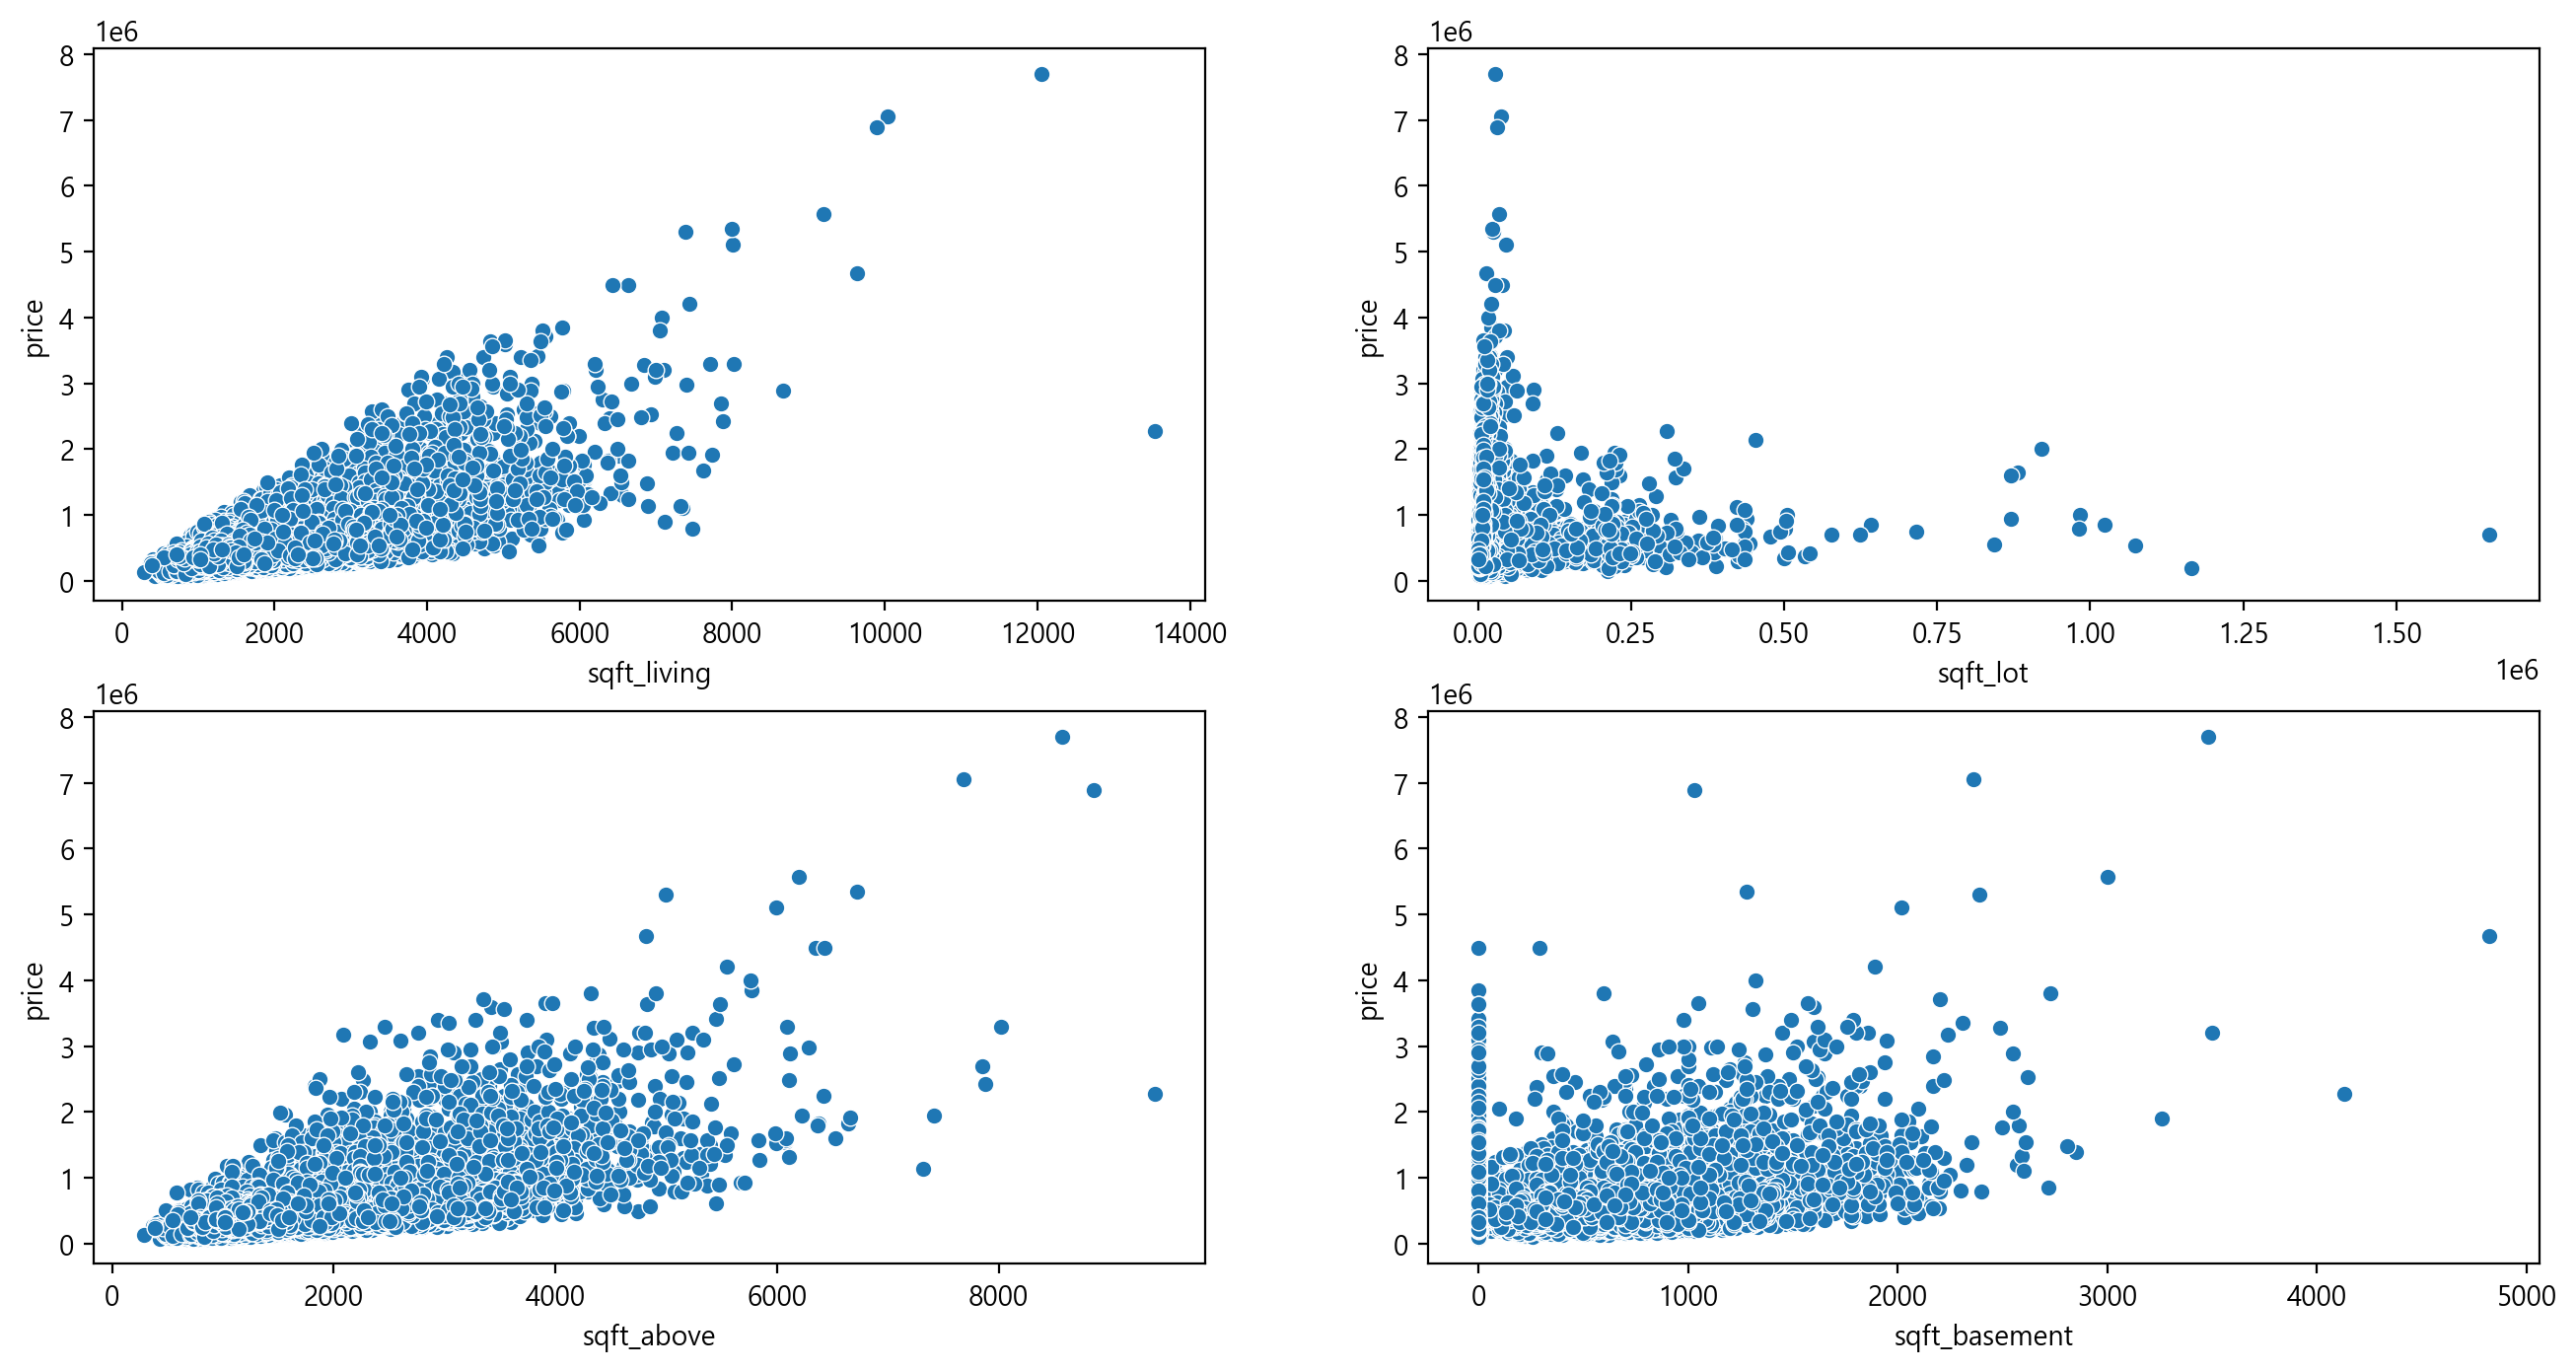

In [32]:
# 집값과 용도 별 sqft 면적(4개 컬럼)간 scatterplot

fig = plt.figure(figsize=(16, 8))

fig.add_subplot(2, 2, 1)
sns.scatterplot(x=df['sqft_living'], y=df['price'])

fig.add_subplot(2, 2, 2)
sns.scatterplot(x=df['sqft_lot'], y=df['price'])

fig.add_subplot(2, 2, 3)
sns.scatterplot(x=df['sqft_above'], y=df['price'])

fig.add_subplot(2, 2, 4)
sns.scatterplot(x=df['sqft_basement'], y=df['price'])

plt.show()

- sqft_lot(단순 대지면적)을 제외하고 대체로 sqft가 넓으면 집값이 상승.

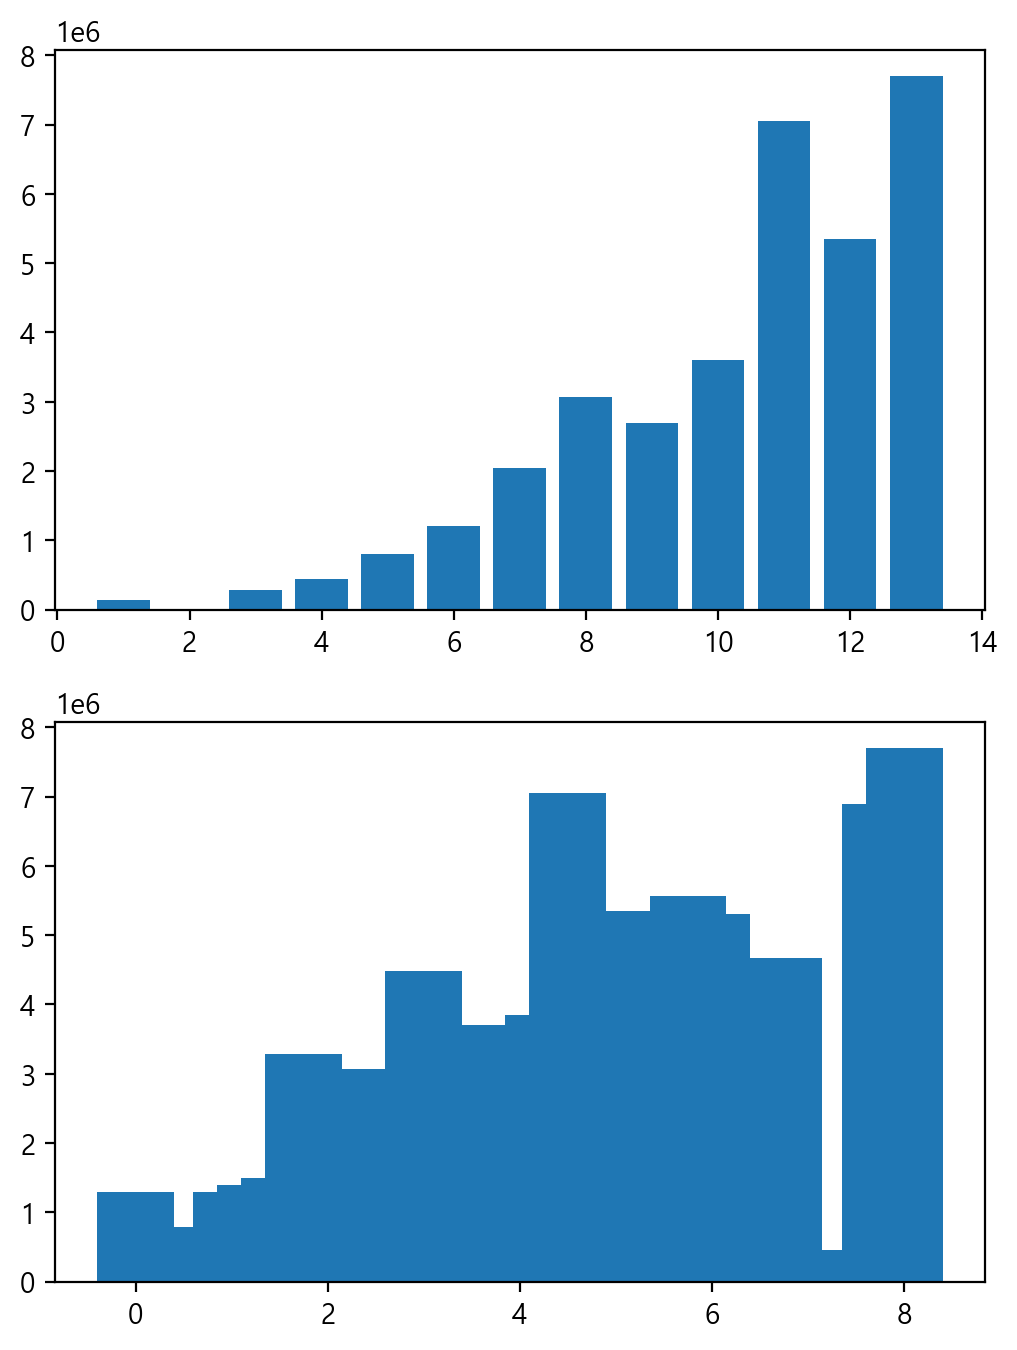

In [33]:
plt.figure(figsize = (6,8))

plt.subplot(2,1,1)
plt.bar(df['grade'], df['price'])

plt.subplot(2,1,2)
plt.bar(df['bathrooms'], df['price'])

plt.show()

- 예외값이 존재하지만, 대체로 집의 grade와 화장실 수 가 많을수록 집값이 높다.

In [34]:
df_sorted = df.sort_values('price', ascending = False)

df_sorted = df_sorted.reset_index(drop = True)

df_sorted

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,9808700762,20140611T000000,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2,9208900037,20140919T000000,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
21609,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
21610,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
21611,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


In [35]:
df_sorted[0:1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [36]:
# price 상위 5개 house
df_sorted[['lat', 'long']][:5]

,lat,long
0,47.6298,-122.323
1,47.6500,-122.214
2,47.6305,-122.240
3,47.6289,-122.233
4,47.6232,-122.220


In [37]:
# price 하위 5개 house
df_sorted[['lat', 'long']][-5:]

,lat,long
21608,47.4987,-122.341
21609,47.4808,-122.315
21610,47.6499,-121.909
21611,47.4739,-122.280
21612,47.2638,-121.906


In [38]:
df.shape[0]

21613

In [39]:
# price 상위 5개 house 위치

locations = []

for i in range(5):
    locations.append([df_sorted.loc[i, 'lat'], df_sorted.loc[i, 'long']])
    

locations

[[47.6298, -122.323],
 [47.65, -122.214],
 [47.6305, -122.24],
 [47.6289, -122.233],
 [47.6232, -122.22]]

In [40]:
# 상위 price map 마킹
# !pip install folium
import folium

# 지도 중심좌표 (Madrona Park, Seattle)
map_center = [47.607171, -122.283942]

# 지도 객체 생성
m = folium.Map(location=map_center, zoom_start = 11)

# 마커추가
for location in locations:
    folium.Marker(
        location=location,
        icon=folium.Icon(icon="cloud"),  
    ).add_to(m)
    
m

- price 1위 house
- 7,700,000 $
  
<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P3/src/price_a.png' width=700/>

- price 1위 house
- price history ($) : 7,700,000 / 9,850,000 / 9,500,315 

<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P4/src/1st_price_house.png' width=700/>

- 실제 Seattle의 집값트렌트 탐색 후, 추가 인사이트 디벨롭

# 데이터 전처리

In [43]:
# id, date, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15 컬럼 삭제
df = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis = 1)

df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400


In [44]:
# 'grade' 컬럼 병합 (0 ~ 7)
df.loc[df['grade'] <= 4,'grade'] = 4
df.loc[df['grade'] >= 11,'grade'] = 11

df['grade'] = df['grade'] - 4

In [45]:
target = 'price'

x = df.drop(target, axis = 1)
y = df[target]

In [46]:
# train, test셋 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 추가 ML
### CatBoost vs XGB, LGMB...
- Level-wise tree 방식 : 대칭적 트리구조, predict 산출 시간 감소
- Ordered Boosting 방식 : 일부 data의 잔차를 기반으로 다음 data에 적용시켜 모델 update
- Random Permutation 방식 : 각 data 잔차 계산시, 매번 shuffle

<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P4/src/boost_models.png' width=700/>

In [63]:
from sklearn.metrics import *

In [47]:
!pip install catboost

In [48]:
# 불러오기
from catboost import CatBoostRegressor

# 선언하기
model = CatBoostRegressor(learning_rate=0.1,
                          depth=4)

# 성능예측
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

y_pred

0:	learn: 353281.8791863	total: 150ms	remaining: 2m 29s
1:	learn: 336981.9125563	total: 155ms	remaining: 1m 17s
2:	learn: 322651.9487619	total: 158ms	remaining: 52.6s
3:	learn: 310219.0732213	total: 160ms	remaining: 39.9s
4:	learn: 299278.3573212	total: 163ms	remaining: 32.5s
5:	learn: 289965.6276650	total: 165ms	remaining: 27.4s
6:	learn: 281571.3039018	total: 167ms	remaining: 23.7s
7:	learn: 273721.0358813	total: 169ms	remaining: 20.9s
8:	learn: 266973.8780292	total: 170ms	remaining: 18.8s
9:	learn: 260662.9888672	total: 172ms	remaining: 17s
10:	learn: 255420.2741457	total: 174ms	remaining: 15.6s
11:	learn: 250410.5129668	total: 176ms	remaining: 14.5s
12:	learn: 246455.3844507	total: 178ms	remaining: 13.5s
13:	learn: 242478.0535351	total: 180ms	remaining: 12.7s
14:	learn: 239309.4876395	total: 181ms	remaining: 11.9s
15:	learn: 236163.1854476	total: 183ms	remaining: 11.3s
16:	learn: 233482.1491828	total: 185ms	remaining: 10.7s
17:	learn: 231116.3096702	total: 186ms	remaining: 10.2s
18

208:	learn: 181803.5365904	total: 513ms	remaining: 1.94s
209:	learn: 181717.4189291	total: 515ms	remaining: 1.94s
210:	learn: 181628.2081367	total: 517ms	remaining: 1.93s
211:	learn: 181519.7994996	total: 519ms	remaining: 1.93s
212:	learn: 181428.4460850	total: 521ms	remaining: 1.92s
213:	learn: 181351.3535287	total: 522ms	remaining: 1.92s
214:	learn: 181333.3217222	total: 524ms	remaining: 1.91s
215:	learn: 181199.3950841	total: 526ms	remaining: 1.91s
216:	learn: 181096.3238207	total: 528ms	remaining: 1.9s
217:	learn: 180996.2157373	total: 529ms	remaining: 1.9s
218:	learn: 180986.9185173	total: 531ms	remaining: 1.89s
219:	learn: 180920.5904934	total: 533ms	remaining: 1.89s
220:	learn: 180849.5336009	total: 535ms	remaining: 1.89s
221:	learn: 180759.8039113	total: 537ms	remaining: 1.88s
222:	learn: 180685.1323780	total: 539ms	remaining: 1.88s
223:	learn: 180627.4560662	total: 540ms	remaining: 1.87s
224:	learn: 180603.5117802	total: 542ms	remaining: 1.87s
225:	learn: 180462.9919418	total:

436:	learn: 171077.2398406	total: 911ms	remaining: 1.17s
437:	learn: 170963.2637944	total: 913ms	remaining: 1.17s
438:	learn: 170898.8081689	total: 915ms	remaining: 1.17s
439:	learn: 170845.8250504	total: 917ms	remaining: 1.17s
440:	learn: 170817.7668288	total: 919ms	remaining: 1.16s
441:	learn: 170764.7328184	total: 920ms	remaining: 1.16s
442:	learn: 170741.0054410	total: 922ms	remaining: 1.16s
443:	learn: 170725.5169013	total: 924ms	remaining: 1.16s
444:	learn: 170701.9972414	total: 926ms	remaining: 1.15s
445:	learn: 170673.1489459	total: 928ms	remaining: 1.15s
446:	learn: 170639.9519841	total: 930ms	remaining: 1.15s
447:	learn: 170626.1265982	total: 931ms	remaining: 1.15s
448:	learn: 170604.8095024	total: 933ms	remaining: 1.15s
449:	learn: 170581.6351212	total: 935ms	remaining: 1.14s
450:	learn: 170560.6525889	total: 937ms	remaining: 1.14s
451:	learn: 170522.3779037	total: 939ms	remaining: 1.14s
452:	learn: 170480.6800312	total: 941ms	remaining: 1.14s
453:	learn: 170464.4524737	tota

655:	learn: 164499.0301835	total: 1.3s	remaining: 681ms
656:	learn: 164478.7247219	total: 1.3s	remaining: 679ms
657:	learn: 164437.7633668	total: 1.3s	remaining: 678ms
658:	learn: 164411.5995636	total: 1.3s	remaining: 675ms
659:	learn: 164384.9383747	total: 1.31s	remaining: 673ms
660:	learn: 164384.3158559	total: 1.31s	remaining: 671ms
661:	learn: 164356.8919054	total: 1.31s	remaining: 669ms
662:	learn: 164319.8979813	total: 1.31s	remaining: 667ms
663:	learn: 164275.6514776	total: 1.31s	remaining: 665ms
664:	learn: 164235.3567304	total: 1.32s	remaining: 663ms
665:	learn: 164187.0196083	total: 1.32s	remaining: 662ms
666:	learn: 164157.6724470	total: 1.33s	remaining: 663ms
667:	learn: 164113.6131031	total: 1.33s	remaining: 662ms
668:	learn: 164093.8075200	total: 1.33s	remaining: 661ms
669:	learn: 164071.4649956	total: 1.34s	remaining: 659ms
670:	learn: 164025.4180170	total: 1.34s	remaining: 657ms
671:	learn: 163981.3107964	total: 1.34s	remaining: 655ms
672:	learn: 163969.5262803	total: 1

839:	learn: 160311.9272836	total: 1.67s	remaining: 318ms
840:	learn: 160272.1145728	total: 1.67s	remaining: 316ms
841:	learn: 160268.5247321	total: 1.67s	remaining: 314ms
842:	learn: 160248.0707500	total: 1.68s	remaining: 312ms
843:	learn: 160240.3590042	total: 1.68s	remaining: 310ms
844:	learn: 160218.9218180	total: 1.68s	remaining: 308ms
845:	learn: 160195.9418744	total: 1.68s	remaining: 306ms
846:	learn: 160177.1444105	total: 1.68s	remaining: 304ms
847:	learn: 160159.4638779	total: 1.69s	remaining: 302ms
848:	learn: 160148.1778354	total: 1.69s	remaining: 300ms
849:	learn: 160111.2742687	total: 1.69s	remaining: 298ms
850:	learn: 160099.7376885	total: 1.69s	remaining: 296ms
851:	learn: 160082.1923963	total: 1.69s	remaining: 294ms
852:	learn: 160068.5035891	total: 1.69s	remaining: 292ms
853:	learn: 160052.8372058	total: 1.7s	remaining: 290ms
854:	learn: 160044.7324613	total: 1.7s	remaining: 288ms
855:	learn: 160016.2003341	total: 1.7s	remaining: 286ms
856:	learn: 159977.4907946	total: 

array([578671.54671616, 298452.70741287, 609385.27323795, ...,
       746457.41727681, 706975.27644773, 335275.8465939 ])

========================================

Linear Regression 0.596  
KNN 0.594  
Decision Tree 0.533  
Random Forest 0.589  
Gradient Boosting Regressor 0.666  
XGB 0.656  
LGBM 0.676  
**CB 0.679**  

========================================  
  
r2_score: **CB** > LGBM > GB > XGB > LR > KNN > RF > DT

# DL Modeling

In [53]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [176]:
x_train.shape

(15129, 11)

### DL 과적합 방지
- **Dropout** : 전체 weight를 계산에 참여시키는 것이 아닐 layer에 포함된 weight 중에서 일부만 참여시키는 것
- **Batch Nomalization** : 배치 정규화는 평균과 분산을 조정하는 과정이 별도의 과정으로 떼어진 것이 아니라, 신경망 안에 포함되어 학습 시 평균과 분산을 조정하는 과정

In [177]:
clear_session()

il = Input(shape = (11,))
hl = Flatten()(il)

hl = Dense(32, activation = 'relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

hl = Dense(16, activation = 'relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

hl = Dense(8, activation = 'relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

ol = Dense(1, activation = 'linear')(hl)

# model 선언
model = Model(il, ol)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 32)                384       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                             

In [178]:
model.compile( optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [179]:
history = model.fit(x_train, y_train, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/10
473/473 [==============================] - 4s 7ms/step - loss: 419653484544.0000 - mse: 419653484544.0000 - val_loss: 443277279232.0000 - val_mse: 443277279232.0000
Epoch 2/10
473/473 [==============================] - 4s 8ms/step - loss: 419638542336.0000 - mse: 419638542336.0000 - val_loss: 443253555200.0000 - val_mse: 443253555200.0000
Epoch 3/10
473/473 [==============================] - 4s 8ms/step - loss: 419611738112.0000 - mse: 419611738112.0000 - val_loss: 443218198528.0000 - val_mse: 443218198528.0000
Epoch 4/10
473/473 [==============================] - 4s 8ms/step - loss: 419574087680.0000 - mse: 419574087680.0000 - val_loss: 443162099712.0000 - val_mse: 443162099712.0000
Epoch 5/10
473/473 [==============================] - 4s 9ms/step - loss: 419528638464.0000 - mse: 419528638464.0000 - val_loss: 443120943104.0000 - val_mse: 443120943104.0000
Epoch 6/10
473/473 [==============================] - 4s 9ms/step - loss: 419475816448.0000 - mse: 419475816448.0000 - v

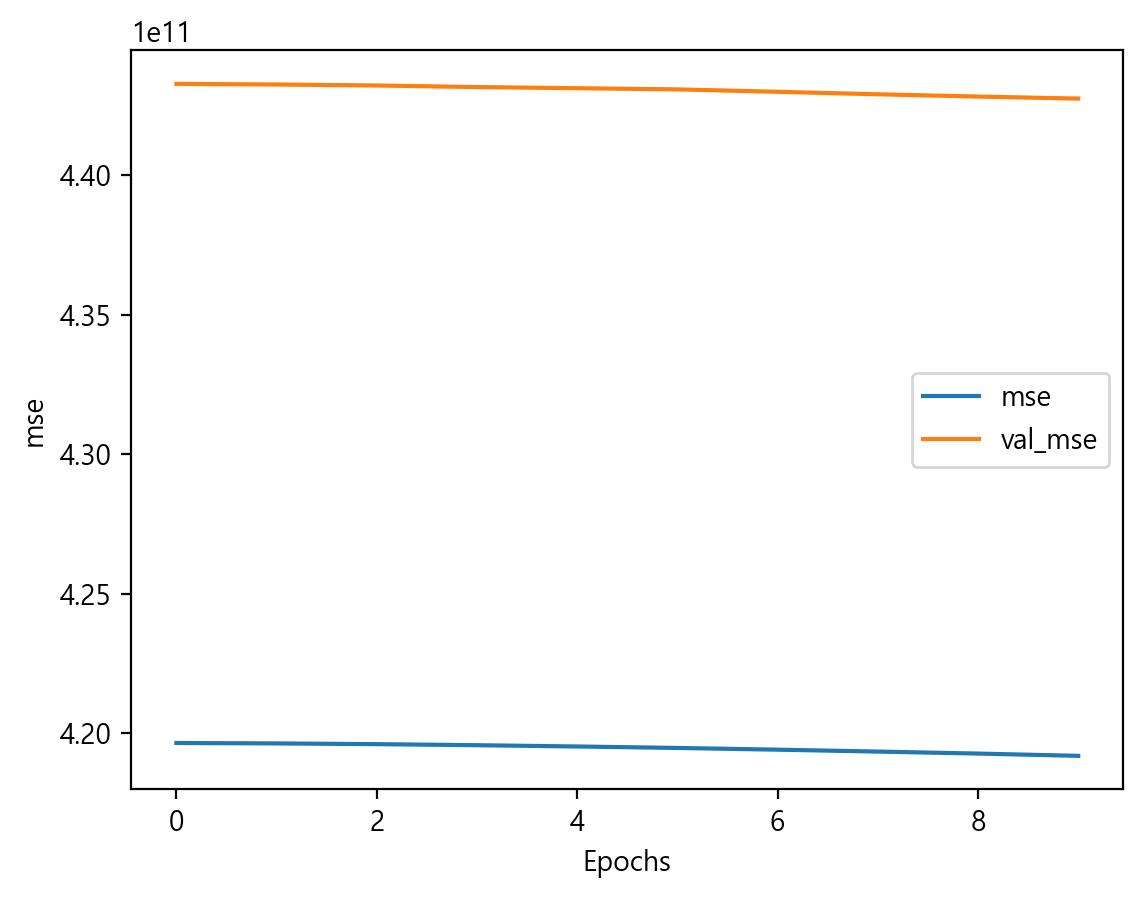

In [180]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend(['mse', 'val_mse'])
plt.show()

### ANN(Artificial Neural Network) vs DNN(Deep Neural Network)
- ANN의 HL의 갯수 늘리면 -> DNN

### ANN

Epoch 1/20
473/473 - 1s - loss: 429396393984.0000 - val_loss: 417108590592.0000 - 1s/epoch - 3ms/step
Epoch 2/20
473/473 - 1s - loss: 421613568000.0000 - val_loss: 401906171904.0000 - 855ms/epoch - 2ms/step
Epoch 3/20
473/473 - 1s - loss: 396560138240.0000 - val_loss: 366792343552.0000 - 707ms/epoch - 1ms/step
Epoch 4/20
473/473 - 1s - loss: 351565611008.0000 - val_loss: 312995905536.0000 - 758ms/epoch - 2ms/step
Epoch 5/20
473/473 - 1s - loss: 291249291264.0000 - val_loss: 248436637696.0000 - 735ms/epoch - 2ms/step
Epoch 6/20
473/473 - 1s - loss: 226072510464.0000 - val_loss: 185398034432.0000 - 862ms/epoch - 2ms/step
Epoch 7/20
473/473 - 1s - loss: 167865499648.0000 - val_loss: 134477209600.0000 - 963ms/epoch - 2ms/step
Epoch 8/20
473/473 - 1s - loss: 126152359936.0000 - val_loss: 102994886656.0000 - 970ms/epoch - 2ms/step
Epoch 9/20
473/473 - 1s - loss: 103133306880.0000 - val_loss: 88286150656.0000 - 1s/epoch - 2ms/step
Epoch 10/20
473/473 - 1s - loss: 94010834944.0000 - val_loss: 

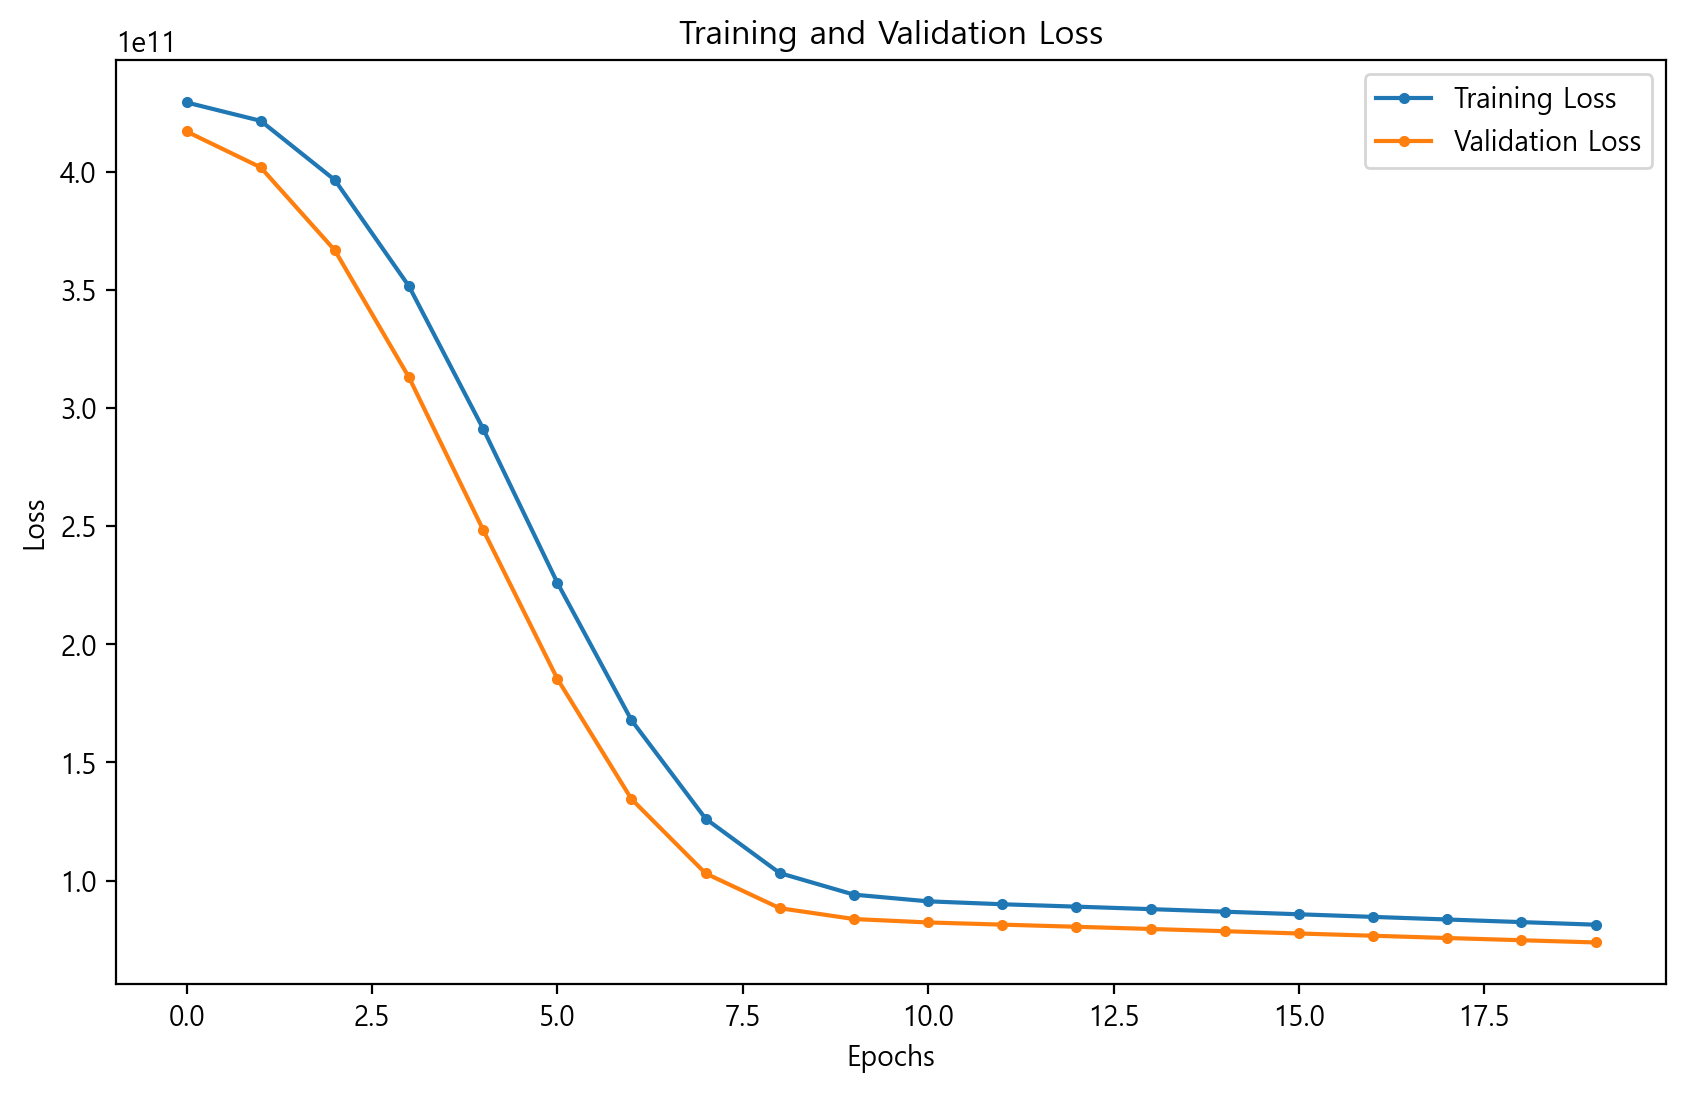

In [57]:
# ANN 모델 만들기
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(11,)))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1))  # 출력 레이어
 
# 모델 컴파일
ann_model.compile(optimizer='adam', loss='mean_squared_error')
 
# 모델 훈련
history = ann_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=2)
 
# 모델 학습 결과 시각화
plt.figure(figsize=(10, 6))
 
# 훈련 및 검증 손실 플롯
plt.plot(history.history['loss'], label='Training Loss',marker = '.')
plt.plot(history.history['val_loss'], label='Validation Loss',marker = '.')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()
 

- epoch 추가

Epoch 1/30
473/473 - 1s - loss: 429448134656.0000 - val_loss: 417287208960.0000 - 1s/epoch - 2ms/step
Epoch 2/30
473/473 - 1s - loss: 422228787200.0000 - val_loss: 403098730496.0000 - 736ms/epoch - 2ms/step
Epoch 3/30
473/473 - 1s - loss: 398772469760.0000 - val_loss: 370057871360.0000 - 707ms/epoch - 1ms/step
Epoch 4/30
473/473 - 1s - loss: 356000792576.0000 - val_loss: 318506467328.0000 - 759ms/epoch - 2ms/step
Epoch 5/30
473/473 - 1s - loss: 297658253312.0000 - val_loss: 255627247616.0000 - 726ms/epoch - 2ms/step
Epoch 6/30
473/473 - 1s - loss: 233397075968.0000 - val_loss: 192714194944.0000 - 644ms/epoch - 1ms/step
Epoch 7/30
473/473 - 1s - loss: 174755774464.0000 - val_loss: 140753551360.0000 - 768ms/epoch - 2ms/step
Epoch 8/30
473/473 - 1s - loss: 130992070656.0000 - val_loss: 106414964736.0000 - 665ms/epoch - 1ms/step
Epoch 9/30
473/473 - 1s - loss: 105813860352.0000 - val_loss: 89994387456.0000 - 843ms/epoch - 2ms/step
Epoch 10/30
473/473 - 1s - loss: 95081267200.0000 - val_los

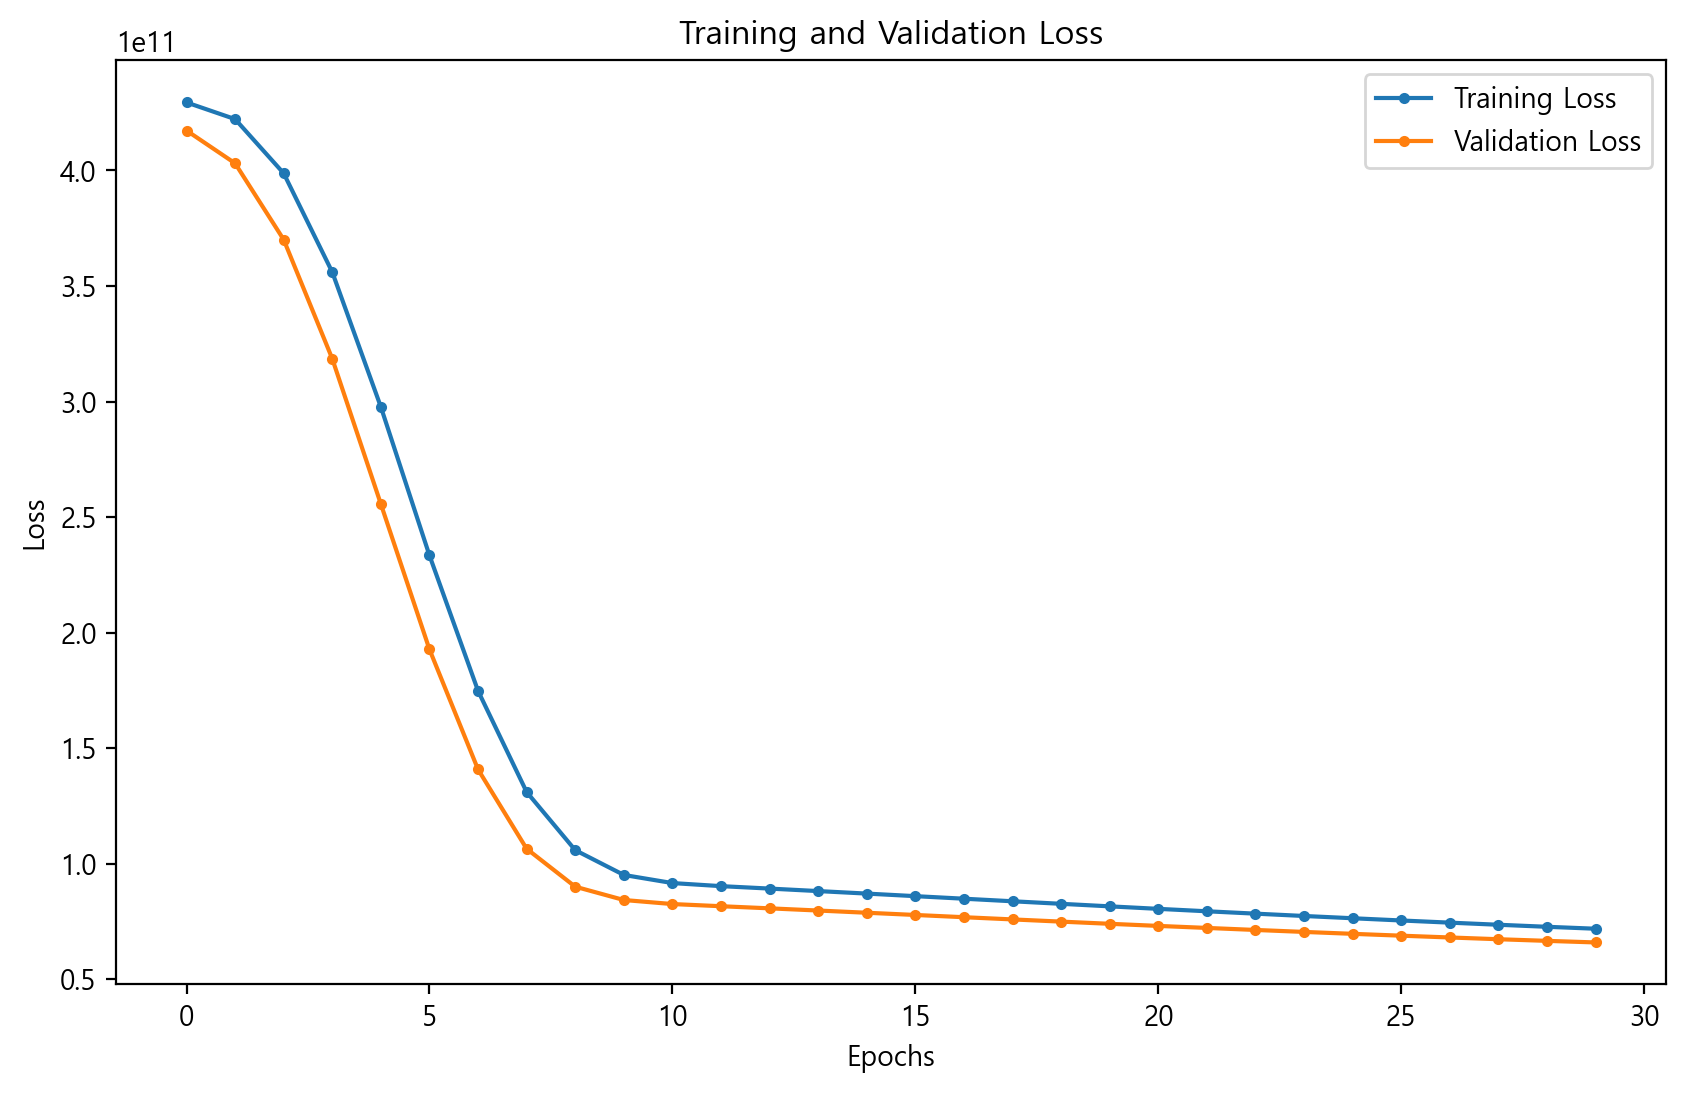

In [60]:
clear_session()
 
# ANN 모델 만들기
ann_model2 = Sequential()
ann_model2.add(Dense(64, activation='relu', input_shape=(11,)))
ann_model2.add(Dense(32, activation='relu'))
ann_model2.add(Dense(1))  # 출력 레이어
 
# 모델 컴파일
ann_model2.compile(optimizer='adam', loss='mean_squared_error')
 
# 모델 훈련
history = ann_model2.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test), verbose=2)
 
# 모델 학습 결과 시각화
plt.figure(figsize=(10, 6))
 
# 훈련 및 검증 손실 플롯
plt.plot(history.history['loss'], label='Training Loss',marker = '.')
plt.plot(history.history['val_loss'], label='Validation Loss',marker = '.')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()
 


In [64]:
# epochs 증가 전/후 성능비교

pred =ann_model.predict(x_test)
 
print(mean_squared_error(y_test, pred, squared = False))
print(mean_absolute_error(y_test, pred))
 
pred =ann_model2.predict(x_test)
 
print(mean_squared_error(y_test, pred, squared = False))
print(mean_absolute_error(y_test, pred))

203/203 [==============================] - 0s 1ms/step
271627.7623244868
174552.23277490746
203/203 [==============================] - 0s 1ms/step
256643.85173092457
164497.7279023365


### DNN 모델

Epoch 1/20
473/473 - 1s - loss: 391111114752.0000 - val_loss: 238051737600.0000 - 1s/epoch - 3ms/step
Epoch 2/20
473/473 - 1s - loss: 117972746240.0000 - val_loss: 81355579392.0000 - 841ms/epoch - 2ms/step
Epoch 3/20
473/473 - 1s - loss: 86879854592.0000 - val_loss: 76784082944.0000 - 829ms/epoch - 2ms/step
Epoch 4/20
473/473 - 1s - loss: 81683496960.0000 - val_loss: 72385986560.0000 - 1s/epoch - 2ms/step
Epoch 5/20
473/473 - 1s - loss: 76648407040.0000 - val_loss: 68228149248.0000 - 1s/epoch - 2ms/step
Epoch 6/20
473/473 - 1s - loss: 71925809152.0000 - val_loss: 64613670912.0000 - 999ms/epoch - 2ms/step
Epoch 7/20
473/473 - 1s - loss: 67944116224.0000 - val_loss: 61772054528.0000 - 976ms/epoch - 2ms/step
Epoch 8/20
473/473 - 1s - loss: 64998481920.0000 - val_loss: 59862618112.0000 - 1s/epoch - 3ms/step
Epoch 9/20
473/473 - 1s - loss: 62908850176.0000 - val_loss: 58580045824.0000 - 1s/epoch - 2ms/step
Epoch 10/20
473/473 - 1s - loss: 61467488256.0000 - val_loss: 57634353152.0000 - 906m

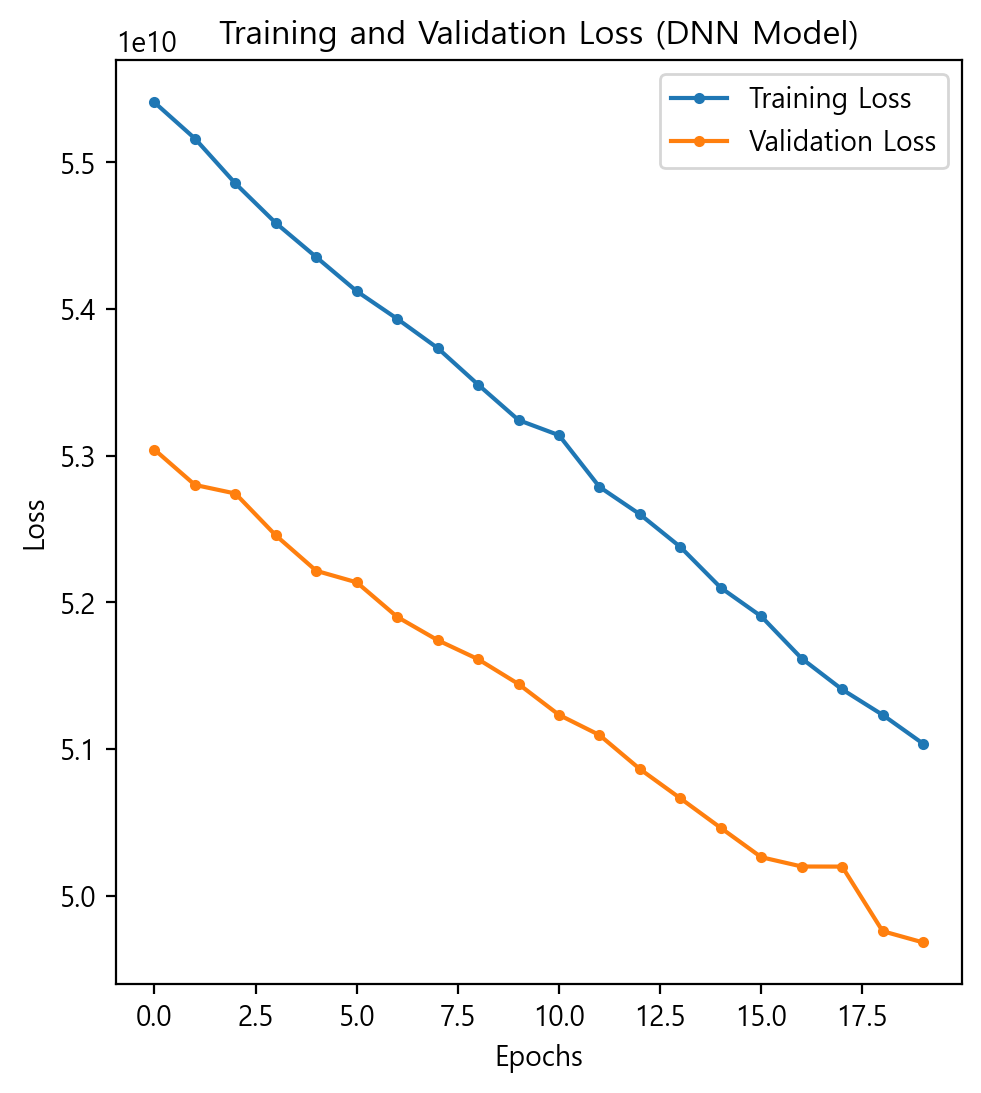

In [58]:
# DNN 모델 만들기 (더 깊은 신경망)
dnn_model = Sequential()
dnn_model.add(Dense(128, activation='relu', input_shape=(11,)))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1))  # 출력 레이어
 
# 모델 컴파일
dnn_model.compile(optimizer='adam', loss='mean_squared_error')
 
# 모델 훈련
dnn_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=2)
 
# 모델 훈련
history_dnn = dnn_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=2)

# 모델 학습 결과 시각화
plt.figure(figsize=(12, 6))
 
# 훈련 및 검증 손실 플롯
plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['loss'], label='Training Loss',marker = '.')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss',marker = '.')
plt.title('Training and Validation Loss (DNN Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

- ANN2 모델로 실제 집값 예측 

In [72]:
# 실제 집값을 예측

new_data = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living': [2000],
    'sqft_lot': [5000],
    'floors': [2],
    'waterfront' : [1],
    'view': [1],
    'condition': [3],
    'grade': [7],
    'sqft_above': [1500],
    'sqft_basement': [500]
    
})
 
# 새로운 데이터에도 동일한 전처리 적용
new_data_scaled = scaler.transform(new_data)
 
# 성능이 더 좋은 ANN2 모델을 사용하여 집값 예측
predicted_price = ann_model2.predict(new_data_scaled)
 
print("예측 집값:", predicted_price[0][0])

1/1 [==============================] - 0s 20ms/step
예측 집값: 982567.0


# Kaggle 1 : House Property Sales (Seattle)
### 2022년 시애틀 주택 가격 datasets

In [181]:
df = pd.read_csv('real_estate_seattle.csv')

df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590,sqft,6000.00,sqft,98144,795000
1,4,2.0,2240,sqft,0.31,acre,98106,915000
2,4,3.0,2040,sqft,3783.00,sqft,98107,950000
3,4,3.0,3800,sqft,5175.00,sqft,98199,1950000
4,2,2.0,1042,sqft,NaN,NaN,98102,950000
...,...,...,...,...,...,...,...,...
2516,5,4.5,5580,sqft,0.30,acre,98146,3800000
2517,3,2.5,1390,sqft,1570.00,sqft,98126,575000
2518,3,2.5,2950,sqft,0.47,acre,98118,3105000
2519,5,5.0,3010,sqft,4887.00,sqft,98115,1807000


In [182]:
df = df[['beds', 'baths', 'price']]

df

,beds,baths,price
0,3,2.5,795000
1,4,2.0,915000
2,4,3.0,950000
3,4,3.0,1950000
4,2,2.0,950000
...,...,...,...
2516,5,4.5,3800000
2517,3,2.5,575000
2518,3,2.5,3105000
2519,5,5.0,1807000


In [183]:
target = 'price'

x = df.drop(target, axis = 1)
y = df[target]
# train, test셋 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [184]:
# 스케일링

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [185]:
x_train.shape

(1764, 2)

In [186]:
# 딥러닝 모델만들어서 1위 price 집의 seattle 2022년의 평균 가격 적정한지?
clear_session()

il = Input(shape = (2,))
hl = Flatten()(il)

hl = Dense(32, activation = 'relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

hl = Dense(16, activation = 'relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

hl = Dense(8, activation = 'relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

ol = Dense(1, activation = 'linear')(hl)

# model 선언
model = Model(il, ol)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 32)                96        
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                             

In [187]:
model.compile( optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [188]:
history = model.fit(x_train, y_train, epochs = 100, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/100
56/56 [==============================] - 6s 19ms/step - loss: 1608298921984.0000 - mse: 1608298921984.0000 - val_loss: 1984352878592.0000 - val_mse: 1984352878592.0000
Epoch 2/100
56/56 [==============================] - 1s 10ms/step - loss: 1608297742336.0000 - mse: 1608297742336.0000 - val_loss: 1984350912512.0000 - val_mse: 1984350912512.0000
Epoch 3/100
56/56 [==============================] - 1s 10ms/step - loss: 1608296824832.0000 - mse: 1608296824832.0000 - val_loss: 1984349863936.0000 - val_mse: 1984349863936.0000
Epoch 4/100
56/56 [==============================] - 1s 10ms/step - loss: 1608295251968.0000 - mse: 1608295251968.0000 - val_loss: 1984348160000.0000 - val_mse: 1984348160000.0000
Epoch 5/100
56/56 [==============================] - 1s 9ms/step - loss: 1608294334464.0000 - mse: 1608294334464.0000 - val_loss: 1984346718208.0000 - val_mse: 1984346718208.0000
Epoch 6/100
56/56 [==============================] - 1s 9ms/step - loss: 1608292106240.0000 - mse: 16

56/56 [==============================] - 1s 9ms/step - loss: 1607380369408.0000 - mse: 1607380369408.0000 - val_loss: 1983394217984.0000 - val_mse: 1983394217984.0000
Epoch 92/100
56/56 [==============================] - 1s 9ms/step - loss: 1607349567488.0000 - mse: 1607349567488.0000 - val_loss: 1983405883392.0000 - val_mse: 1983405883392.0000
Epoch 93/100
56/56 [==============================] - 1s 9ms/step - loss: 1607354941440.0000 - mse: 1607354941440.0000 - val_loss: 1983403130880.0000 - val_mse: 1983403130880.0000
Epoch 94/100
56/56 [==============================] - 1s 10ms/step - loss: 1607324794880.0000 - mse: 1607324794880.0000 - val_loss: 1983378620416.0000 - val_mse: 1983378620416.0000
Epoch 95/100
56/56 [==============================] - 1s 9ms/step - loss: 1607301726208.0000 - mse: 1607301726208.0000 - val_loss: 1983331696640.0000 - val_mse: 1983331696640.0000
Epoch 96/100
56/56 [==============================] - 1s 9ms/step - loss: 1607300022272.0000 - mse: 160730002227

In [189]:
x_test

,beds,baths
2386,3,3.0
2071,2,1.0
2496,3,2.5
276,1,1.0
2336,3,2.5
...,...,...
2264,3,2.5
253,3,2.5
773,1,1.0
2423,3,3.0


In [190]:
y_pred = model.predict([[1, 2]])

y_pred

1/1 [==============================] - 0s 379ms/step


array([[1014.9512]], dtype=float32)

- **Seattle**의 침실 3개, 화장실 5개인 집의 예측가격 : **20324 $**

# Kaggle 2 : House Property Price Prediction (Time Series)
### 2007-2019년 집값 시계열 데이터 datasets

- LSTM : RNN의 **장기 문맥 의존성** 해결

<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P4/src/lstm.png' width=700/>

In [191]:
# LSTM import
from keras.layers import LSTM

In [192]:
df = pd.read_csv('sales_time.csv')

df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [193]:
# 거래날짜 컬럼 datetime 형변환
df['datesold'] = pd.to_datetime(df['datesold'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [194]:
df['datesold'] = df.loc[df['datesold'].dt.year >= 2014, 'datesold']

df = df.dropna(axis = 0)

df.drop(['postcode', 'propertyType'], axis = 1)

,datesold,price,bedrooms
8223,2014-01-06,406000,3
8224,2014-01-06,537000,4
8225,2014-01-07,382000,3
8226,2014-01-07,443200,3
8227,2014-01-07,515000,4
...,...,...,...
29575,2019-07-25,500000,3
29576,2019-07-25,560000,2
29577,2019-07-26,464950,2
29578,2019-07-26,589000,2


In [195]:
# 전처리

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df['price'].values.reshape(-1, 1))

sequence_length = 10  #10 단위기간 후

X = []  # 현재 집값
y = []  # 미래 집값

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length])
    y.append(df['price'].iloc[i+sequence_length])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LSTM 모델
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, X.shape[2]), activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics = ['mse'])


model.fit(X_train, y_train, epochs = 30, batch_size=32)

pred = model.predict(X_test)



Epoch 1/30
505/505 [==============================] - 10s 13ms/step - loss: 168796372992.0000 - mse: 168796372992.0000
Epoch 2/30
505/505 [==============================] - 6s 12ms/step - loss: 90903330816.0000 - mse: 90903330816.0000
Epoch 3/30
505/505 [==============================] - 6s 12ms/step - loss: 90617847808.0000 - mse: 90617847808.0000
Epoch 4/30
505/505 [==============================] - 6s 12ms/step - loss: 90751221760.0000 - mse: 90751221760.0000
Epoch 5/30
505/505 [==============================] - 6s 12ms/step - loss: 90652647424.0000 - mse: 90652647424.0000
Epoch 6/30
505/505 [==============================] - 6s 12ms/step - loss: 90441662464.0000 - mse: 90441662464.0000
Epoch 7/30
505/505 [==============================] - 6s 12ms/step - loss: 90679074816.0000 - mse: 90679074816.0000
Epoch 8/30
505/505 [==============================] - 6s 12ms/step - loss: 90782433280.0000 - mse: 90782433280.0000
Epoch 9/30
505/505 [==============================] - 6s 12ms/step - 

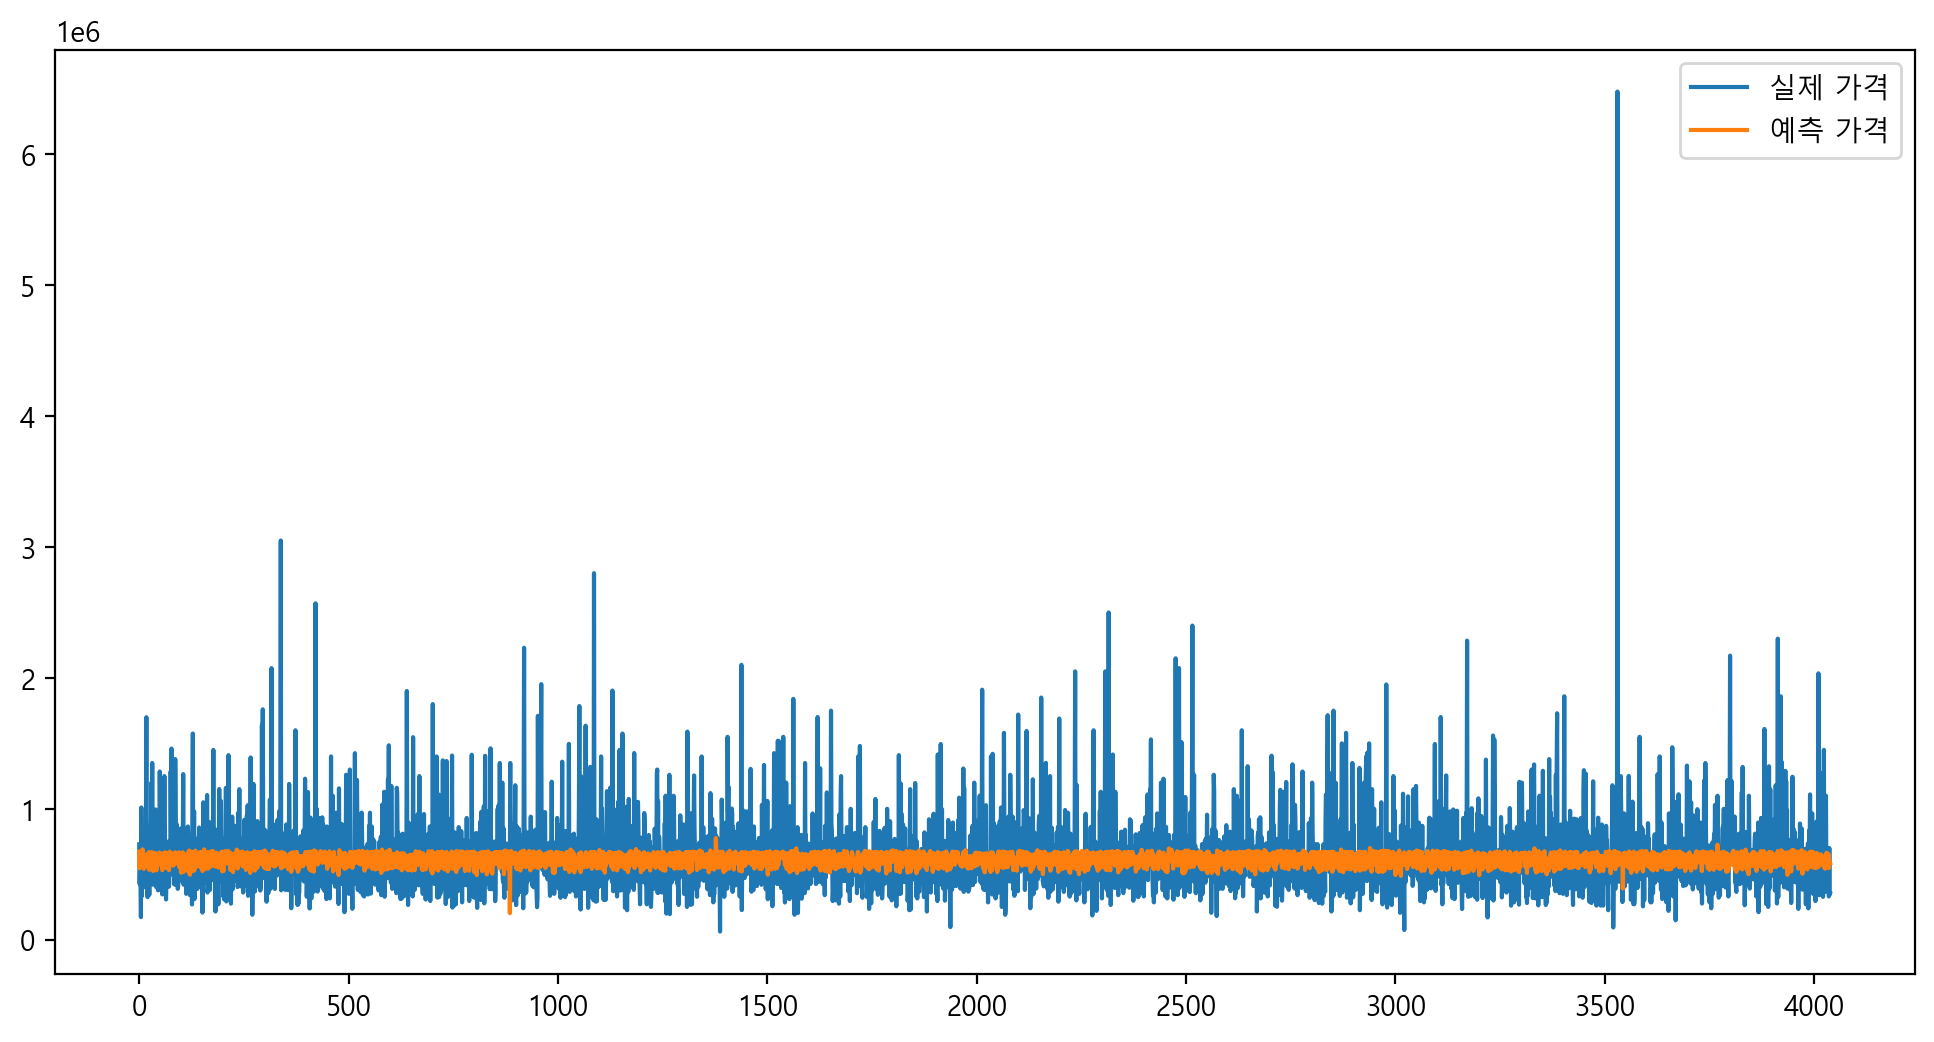

In [196]:
# 시각화

plt.figure(figsize=(12, 6))

plt.plot(y_test, label='실제 가격')
plt.plot(pred, label='예측 가격')
plt.legend()
plt.show()

In [197]:
# 미래 집값

future_data = data_scaled[-sequence_length:].reshape(1, -1, X.shape[2])

future_price = model.predict(future_data)

future_price = scaler.inverse_transform(future_price)

future_price

1/1 [==============================] - 0s 59ms/step


array([[3.930377e+12]], dtype=float32)

<Axes: xlabel='year'>

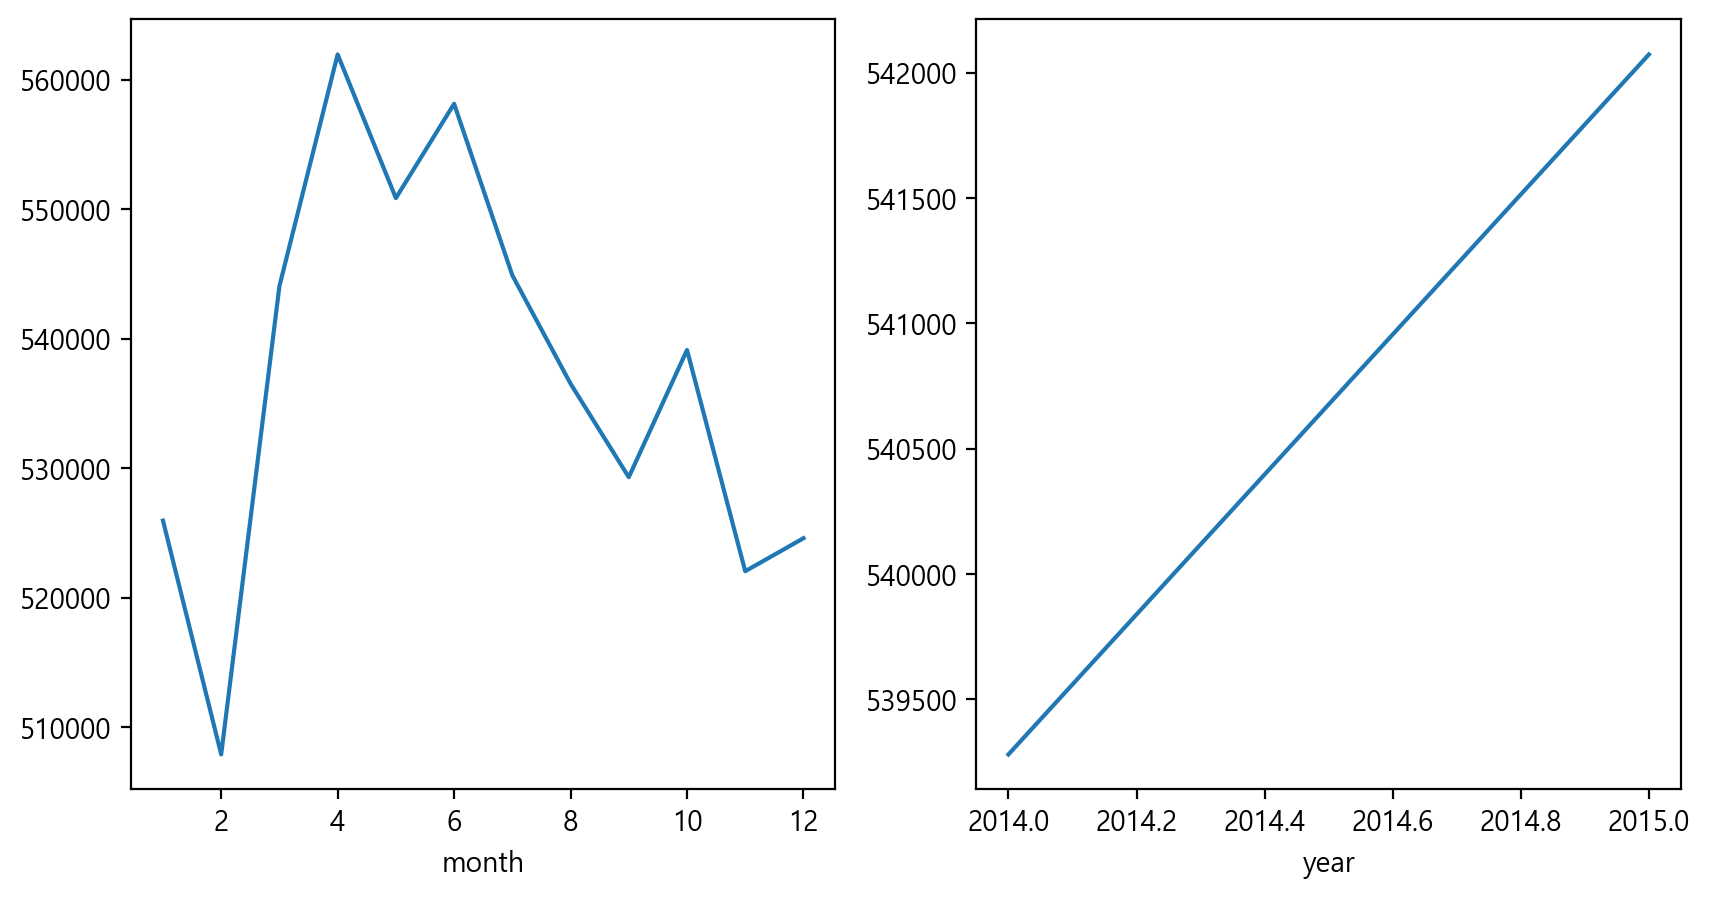

In [18]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
df.groupby('month').mean()['price'].plot()

fig.add_subplot(1, 2, 2)
df.groupby('year').mean()['price'].plot()

- Target Region의 집값 움직임을 파악하여 시장 상황에 맞는 지역별로 차별화된 주택정책을 수립 및 진행하여 정책의 효율성을 높인다.
- 투자자의 입장에서 투자지역의 특징을 고려하려 이상치 값을 최대한 제외하고 보다 과거의 집값 정보를 바탕으로 예측된 가격을 통해 합리적인 투자를 할 수 있을 것으로 기대된다.

### Seattle, WA Housing Market 통계

<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P4/src/seattle_market.png' width=700/>

- Seattle의 평균 집값은 **800,000 $**

## <span style="background-color: #FFB6C1">결론 및 인사이트</span>
- 집값에 영향을 미치는 가장 중요한 요소는 grade, sqft_living이다.
- 또한, 집이 거래될 때 제곱미터당 일정 금액의 가격이 책정되기 때문에 'sqft_living'이 높은 상관성을 보인다고 예측할 수 있다.
- 등급의 경우도 집의 전반적 상태를 표현하는 것일 수도 있지만 집값에 대한 소비자의 심리를 이용한 지표로 생각하였다.
- Seattle의 물가 상승률, 인프라 접근성, 거주자 만족도 등을 모두 고려하려 계약 또는 투자를 하는 것이 합리적이다.

### 추가: lat, long
- 데이터 전처리 과정에서 lat과 long 컬럼을 삭제한 뒤 모델링을 진행하였지만, 삭제하지 않고 진행하게 되면 lat과 long이 상대적으로 높은 상관성을 보인다.
- lat(위도)와 long(경도)의 조합은 집의 위치를 나타내기 때문에 집값에 영향을 미치게 된다.
- 대중교통이 편리한 위치, 학군이 좋은 위치는 일반적으로 더 높은 가격에 판매되고, 공원이나 호수 근처의 장소는 주변 환경에 비해 가격이 높기 때문에 lat과 long이 높게 산출된 것으로 보인다.

- 출처  
https://maps.google.com  
https://sites.google.com/view/vinegarhill-datalabs/introduction-to-machine-learning/kings-county-house-prices  
https://www.kaggle.com/datasets/htagholdings/property-sales/data   
https://www.kaggle.com/datasets/samuelcortinhas/house-price-prediction-seattle/  
https://www.zillow.com/homes/1137-Harvard-Ave-E-Seattle,-WA-98102_rb/49005970_zpid/  
https://www.redfin.com/city/16163/WA/Seattle/housing-market#top10